# Linear Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import scipy

%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

## Classifying Cardio

In [2]:
data = pd.read_csv('../resources/cardio_train.csv', sep=';')
df = pd.concat([data.age, data.weight, data.cardio], axis=1, join='inner')

print(df)

         age  weight  cardio
0      18393    62.0       0
1      20228    85.0       1
2      18857    64.0       1
3      17623    82.0       1
4      17474    56.0       0
...      ...     ...     ...
69995  19240    76.0       0
69996  22601   126.0       1
69997  19066   105.0       1
69998  22431    72.0       1
69999  20540    72.0       0

[70000 rows x 3 columns]


In order to feed the data to an algorithm, we have to convert the string 'type' to a numerical label ($\{-1, +1\}$ in this case).
Create a new column 'label' which contains the value 1 if the type is 'sand' and -1 otherwise.

In [3]:
patient_has_cardio = 1
df["label"] = df.apply(lambda row: 1 if (row.cardio == patient_has_cardio) else -1, axis=1)


### Exploring the data


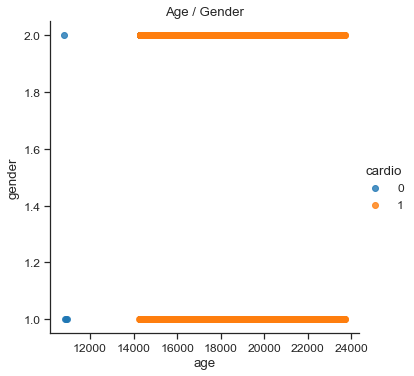

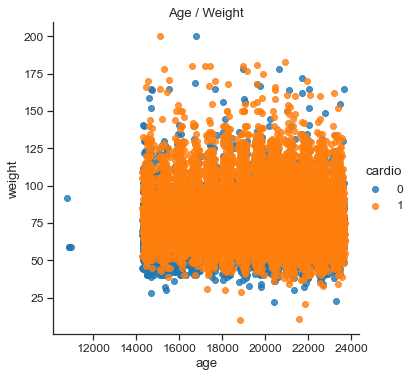

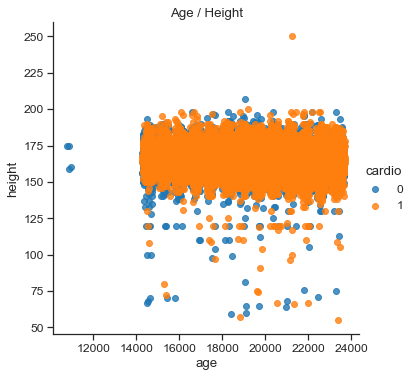

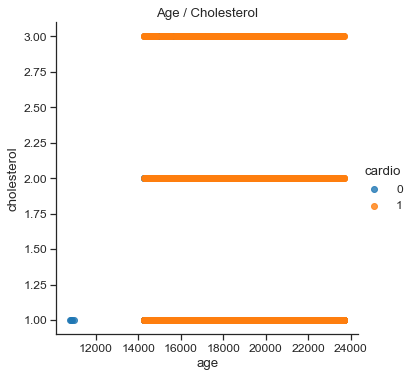

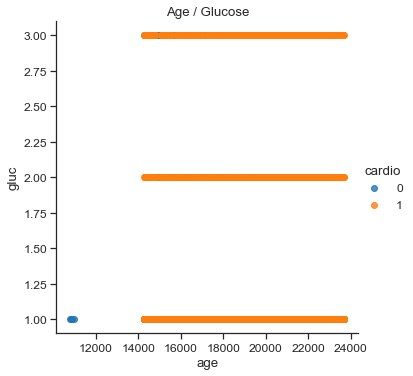

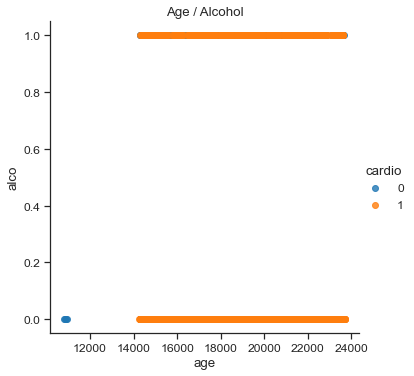

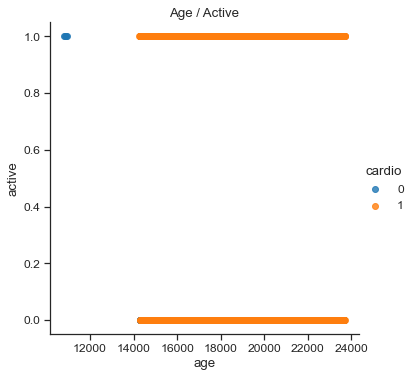

In [4]:
#sns.lmplot(x='weight', y='age', hue='cardio', data=df, fit_reg=False)
sns.lmplot(x='age', y='gender', hue='cardio', data=data, fit_reg=False).set(title='Age / Gender')
sns.lmplot(x='age', y='weight', hue='cardio', data=data, fit_reg=False).set(title='Age / Weight')
sns.lmplot(x='age', y='height', hue='cardio', data=data, fit_reg=False).set(title='Age / Height')
sns.lmplot(x='age', y='cholesterol', hue='cardio', data=data, fit_reg=False).set(title='Age / Cholesterol')
sns.lmplot(x='age', y='gluc', hue='cardio', data=data, fit_reg=False).set(title='Age / Glucose')
sns.lmplot(x='age', y='alco', hue='cardio', data=data, fit_reg=False).set(title='Age / Alcohol')
sns.lmplot(x='age', y='active', hue='cardio', data=data, fit_reg=False).set(title='Age / Active')


### Result
> The data is a mess and at the first look not linear separable. So a simple linear classification is not possible.
>
> A linear regression does not make sense with the result being a binary "class".

### Kernel / Feature function

Proceed by using introducing another dimension to make the data linear separable. This is done by using a feature function or kernel.

linar: $h(x) = w^T*x$ or nonlinar: $h(x) = w^T*\Phi(x)$

Feature Function $\Phi(x)$  based on Age = $A$ and Weight = $W$

$x = [A, W] ∈ R^2$

$ \Phi(x_2) = [1, A, W, A^2, W^2, AW] ∈ R^6$ - optional with ($\sqrt{2}$ for ease of calculation)


 With
 $ K(x, z) = \Phi(x)^T\Phi(z) = (x^T*z+1)^d$ with degree $d = 2$ for a two-dimensional input $x ∈ R^2$.

 $h(x) = w^T * \Phi(x_i)= w^T*K(x,z) = w^T * (x^T*z+1)^d $

$ min J(w) = \frac{1}{m} \sum_{i=1}^{m} l(h(x_i), y_i) + \Omega(w)$


# Kernel Logistic Regression

## Datensatz teilen
in validation, train und test

In [ ]:
df = pd.read_csv('rocktypes.csv', sep=' ')
X = df[['Ip','VpVs']].values
y = df['type'].apply(lambda t: 1 if t=='shale' else -1).values

# data ohne Blutdruck, Cradio

## Implement Cross Validation

In [ ]:
# TODO Leo


### Feature Scaling
1. TODO Jan

In [ ]:
#from sklearn import preprocessing
# normalize data using scipy
#X = preprocessing.StandardScaler().fit_transform(X) -. Feature scaling?


Implement the regularized kernlized logistic regression objective, give by

$
J(\alpha) = \frac{1}{m}\sum_{i=1}^m  \log \big(1 + \exp\big(-y_i \cdot \sum_{j=1}^{m} \alpha_j k(x_j,x_i)\big) \big) + \lambda \alpha^{\intercal}K\alpha
$


In [ ]:
def sqdist(X, Z):
    p1 = np.sum(X**2, axis=1)[:, np.newaxis]
    p2 = np.sum(Z**2, axis=1)
    p3 = -2 * np.dot(X, Z.T)
    return p1+p2+p3

def sq_exp(X, Z, sigma):
    return np.exp(-sqdist(X, Z)/(2*sigma**2) )


def J(α, X, y, sigma, lam):
    K = sq_exp(X, X, sigma)
    m = X.shape[0]
    total_loss = 0
    regularization = lam * np.dot(np.dot(np.transpose(α), K), α)

    for i in range(m):
        prediction = 0
        for j in range(m):
            prediction += α[j]*K[i][j]
        logistic_loss = np.log(1 + np.exp(-y[i] * prediction))
        total_loss += logistic_loss

    mean_loss = total_loss / m  + regularization
    return mean_loss

Implement the gradient of the regularized kernlized logistic regression objective.

In [ ]:
def dJ(α, X, y, sigma, lam):
    K = sq_exp(X, X, sigma)
    m = X.shape[0]
    gradient = 0
    regularization = 2*lam * np.dot( K, α)

    for i in range(m):
        prediction = 0
        for j in range(m):
            prediction += α[j]*K[i][j]

        numerator = -y[i] * K[i]
        denominator = 1 + np.exp(y[i] * prediction)
        gradient += numerator / denominator

    mean_gradient = gradient / m + regularization
    return mean_gradient


In [ ]:
from scipy.optimize import minimize

def plot_fit(h=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    s1 = ax.scatter(X[y>=0,0], X[y>=0,1], marker='.', color='gray')
    s2 = ax.scatter(X[y<=0,0], X[y<=0,1], marker='.', color='orange')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.xlabel("Ip")
    plt.ylabel("Vp/Vs")
    plt.legend([s1,s2], ['sand', 'shale'])
    if h:
        grid =150
        xx,yy = np.meshgrid(np.linspace(xlim[0], xlim[1], grid), np.linspace(ylim[0], ylim[1], grid))
        XY = np.array([np.ravel(xx), np.ravel(yy)]).T
        P = h(XY).reshape(grid, grid)
        cn = ax.contour(xx, yy, P, colors='k',levels=10)
        ax.clabel(cn, inline=1, fontsize=10)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def kernel_lr(X, y, sigma, lam):
    # implementation of kernel ridge regression using the scipy optimizer gradient descent
    α = np.zeros(X.shape[0],)
    α = minimize(J, α, args=(X, y, sigma, lam), jac=dJ, method='CG').x
    h = lambda Z: np.dot(α, sq_exp(X, Z, sigma))
    return h

plot_fit(kernel_lr(X, y, sigma=0.5, lam=0.1))

In [ ]:
sigmas=[0.1, 1, 3]
lambdas=[1e-10, 0.1, 1]

fig, axs = plt.subplots(len(sigmas), len(lambdas), figsize=(15,15))
for i, sigma in enumerate(sigmas):
    for j, lam in enumerate(lambdas):
        plot_fit(kernel_lr(X, y, sigma, lam), ax=axs[i,j])
        axs[i,j].set_title(f'$\sigma={sigma}$\t$\lambda={lam}$')

